# CSE 6367 Programming Assignment 2 (P2)

## Spring 2023

Parth Lahane 1001912459

## Due: 11:59pm Central Time, Wednesday, April 5, 2023

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from collections import defaultdict
from itertools import product

In [ ]:
def loadImages(path):
  return cv2.imread(path)

def displayImage(img):
  return cv2_imshow(img)
  
def convertGray(img):
  return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def applyCanny(img, low, high, l = True):
  return cv2.Canny(img, threshold1 = low, threshold2 = high, L2gradient = l)

def applyOtsu(img):
  _, thresholded_image = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  return thresholded_image

### Task 1 (50 points) 

Implement Hough transform from scratch to detect circles in the image. Refer to this wiki page for pseudocode(https://en.wikipedia.org/wiki/Circle_Hough_Transform). Superimpose detected circles on the original image.

Note: You shouldn't use cv2.HoughCircles() to detect the circles.

![circles-2.jpeg](attachment:circles-2.jpeg)

In [ ]:
def Hough(img, orig_img, rmin = 20, rmax = 28, steps = 50, threshold = 0.45):
  original_img = img.copy()

  dtheta = 360 // steps
  thetas = np.arange(0, 360, step=dtheta)

  cos_thetas = np.cos(np.radians(thetas))
  sin_thetas = np.sin(np.radians(thetas))

  points = []
  for r in range(rmin, rmax + 1):
    for t in range(steps):
      points.append((r, int(r * cos_thetas[t]), int(r * sin_thetas[t])))


  acc = defaultdict(int)
  pixels = list(product(list(range(0, img.shape[0])), list(range(0, img.shape[1], 1))))
  for x, y in pixels:
      if img[x][y] != 0: 
        for r, dx, dy in points:
          a = x - dx
          b = y - dy
          acc[(a, b, r)] += 1

  circles = []
  
  for k, v in sorted(acc.items(), key=lambda i: i[1], reverse = True):
      x, y, r = k
      current_vote_percentage = v / steps
      if current_vote_percentage >= threshold: 
        circles.append((x, y, r))
  for x, y, r in circles:
    original_img = cv2.circle(orig_img, (y,x), r, (100,25,25), 1)
  return original_img

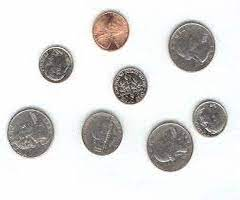

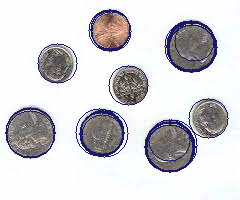

In [ ]:
circles_images = loadImages('./Images/circles.jpeg')
displayImage(circles_images)
gray_circles = convertGray(circles_images)
canny_circles = applyCanny(gray_circles, 150, 200)
output = Hough(canny_circles, circles_images)
displayImage(output)

### Task 2 (50 points)

Implement Harris corner detector from scratch. The steps are mentioned in Slide 46-47 on your lecture slide "5-Harris-corner-detector.pdf". Mark detected corners on original image. 

Note: You shouldn't use cv2.cornerHarris() to detect the corners.

![checkerboard-2.png](attachment:checkerboard-2.png)

In [ ]:
def Harris(img, w = 3, k = 0.04, t = 100000000):
  original_img = img.copy()
  
  img1_gray = convertGray(img)
  h, b = img.shape[0], img.shape[1]
  indexes = list(product(list(range(1, h - w//2)), list(range(1, b - w//2))))
  dy, dx = np.gradient(img1_gray)

  g_dx2 = cv2.GaussianBlur(np.square(dx),(3,3), 0.5)
  g_dy2 = cv2.GaussianBlur(np.square(dy),(3,3), 0.5)
  g_dxdy = cv2.GaussianBlur(np.multiply(dx, dy),(3,3), 0.5)

  corner_list = []
  
  for y, x in indexes:
    start_y = y - w//2
    end_y = y + w//2 + 1
    start_x = x - w//2
    end_x = x + w//2 + 1

    Sx2 = (g_dx2[start_y : end_y, start_x : end_x]).sum()
    Sy2 = (g_dy2[start_y : end_y, start_x : end_x]).sum()
    Sxy = (g_dxdy[start_y : end_y, start_x : end_x]).sum()
    
    r = Sx2 * Sy2 - (Sxy**2)  - k*((Sx2+Sy2)**2)

    if r > t:
        corner_list.append([x, y, r])
        original_img[y,x] = (200,200,0)

  return original_img 

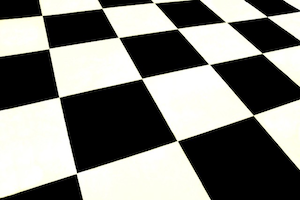

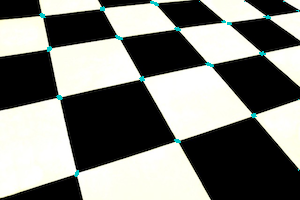

In [ ]:
checkboard_images = loadImages('./Images/checkerboard.png')
displayImage(checkboard_images)
output = Harris(checkboard_images)
displayImage(output)

## Submission Guidelines:

    Submit through Canvas your source code in a single .ipynb file. The name of the .ipynb file should be YourStudentID.ipynb. (For example: 1001234567.ipynb)
    Import all the images from the ./Images directory. Your TA will use the same directory name to grade your submission.
    You don't need to attach the image file with your submission.
